# Изучение рынка заведений общественного питания Москвы

- Автор: Екатерина Лощинская
- Дата: 03.02.2025

### Цели и задачи проекта
<a class='anchor' id="link1"></a>

**Цель:** Провести исследовательский анализ рынка объектов общественного питания Москвы  с выявлением оптимальных характеристик для открытия нового заведения.


**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить детально данные по категориям заведений, количеству посадочных мест, среднему чеку и расположению;
    - изучить взаимосвязь рейтинга заведений с другими данными.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

<a class='anchor' id="link2"></a>
Для анализа датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.Данные состоят из двух датасетов:


Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:

name — название заведения;

address — адрес;

district — административный район;

category — категория;

hours — дни и часы работы;

rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

chain — является ли заведение сетевым;

seats — количество посадочных мест.




Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:

price — категория цен в заведении;

avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;

middle_avg_bill — число с оценкой среднего чека для значений из столбца avg_bill;

middle_coffee_cup — число с оценкой одной чашки капучино для значений из столбца avg_bill.




### Содержимое проекта

- [Цели и задачи проекта](#link1) 

- [Описание данных ](#link2)

- [Загрузка данных и знакомство с ними](#link3)

- [Проверка ошибок в данных и их предобработка](#link4)

- [Исследовательский анализ данных](#link5)

- [Итоговый вывод](#link6)

## 1. Загрузка данных и знакомство с ними
<a class='anchor' id="link3"></a>

Загрузим необходимые библиотеки Python и данные из файлов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
df_rest = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')                 

Познакомимся с данными: выведем первые строки и информацию о датафреймах.

In [3]:
display(df_rest.head())
display(df_rest.info())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

In [4]:
display(df_price.head(5))
display(df_price.info())

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

---

### Промежуточный вывод


Датасет 'datasets/rest_info.csv' содержит 8406 строк, диапазон индексов — от 0 до 8405. Всего в данных 9 столбцов, их название соответствует описанию данных, предоставленному к проекту.

В данных 6 столбцов типа object, 2 - float64, 1 - int64.

В 2 столбцах датафрейма встречаются пропуски (hours, seats). 

Датасет 'datasets/rest_price.csv' содержит 4058 строк, диапазон индексов — от 0 до 4057. Всего в данных 5 столбцов, 3 - тип object, 2 - тип float64. Во всех столбцах (кроме id) есть значительное количество пропусков.


При первичном ознакомлении с данными можно сделать вывод, что значения в столбцах соответствуют своему описанию.



### Подготовка единого датафрейма

Для последующего анализа объединим данные о заведениях и данные о ценах по столбцу с id объекта общественного питания. Ввиду того, что данные собраны из открытых источников, в датасете с ценами очень много пропущенных значений. Для присоединения  использован метод left. Он сохраняет все строки из датафрейма с данными о заведениях и добавляет соответствующие строки из датафрейма с ценами. Левое присоединение следует использовать, так как для последующего анализа полезно сохранить все данные о заведениях, даже если информации о ценах нет.


In [5]:
df_merged = df_rest.merge(df_price, on='id', how='left')
display(df_merged.head()) 
display(df_merged.info()) 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


None

После объединения получился датафрейм в котором 8406 строки, 13 столбцов (4 столбца float64, 1 столбец int64, 8 - object).

## 2. Предобработка данных
Проверим название столбцов. Они приведены к стилю snake case, это удобно для последующей работы с данными.

In [6]:
display(df_merged.columns)

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

Проверим, требуется ли преобразование типов данных. 

In [7]:
display(df_merged.dtypes) 
display(df_merged.head())

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [8]:
#Отображаем уникальные значения некоторых столбцов, чтобы проанализировать, требуется ли преобразование типа данных
for column in ['hours','chain', 'seats','middle_avg_bill','middle_coffee_cup']:
    display(df_merged[column].unique())

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

array([0, 1])

array([      nan, 4.000e+00, 4.500e+01, 1.480e+02, 7.900e+01, 6.500e+01,
       1.020e+02, 1.800e+02, 9.600e+01, 2.500e+01, 4.600e+01, 4.000e+01,
       2.470e+02, 2.100e+01, 8.000e+00, 3.500e+01, 2.400e+02, 8.500e+01,
       1.200e+01, 6.000e+01, 1.200e+02, 1.600e+01, 8.000e+01, 5.000e+01,
       4.400e+01, 4.300e+01, 9.000e+01, 0.000e+00, 1.980e+02, 9.500e+01,
       3.500e+02, 1.240e+02, 1.000e+01, 7.000e+01, 4.800e+01, 6.000e+00,
       9.800e+01, 3.000e+01, 5.200e+01, 2.000e+01, 2.000e+00, 1.800e+01,
       2.200e+01, 1.500e+01, 2.800e+01, 3.000e+02, 7.500e+01, 3.200e+01,
       1.000e+02, 1.100e+02, 2.300e+02, 2.500e+02, 1.300e+02, 8.400e+01,
       3.980e+02, 2.700e+01, 2.860e+02, 1.450e+02, 3.600e+01, 9.700e+01,
       2.260e+02, 1.400e+02, 1.660e+02, 2.020e+02, 9.400e+01, 1.890e+02,
       5.300e+01, 1.040e+02, 7.200e+01, 1.310e+02, 1.050e+02, 5.500e+01,
       1.700e+01, 1.000e+00, 1.150e+02, 3.100e+02, 7.700e+01, 1.600e+02,
       3.200e+02, 3.400e+01, 1.500e+02, 2.000e+02, 

array([      nan, 1.550e+03, 1.000e+03, 5.000e+02, 1.990e+02, 2.500e+02,
       1.100e+03, 3.300e+02, 1.500e+03, 4.000e+02, 2.450e+02, 4.250e+02,
       9.000e+02, 2.400e+02, 2.250e+02, 3.280e+02, 3.000e+02, 3.450e+02,
       2.300e+02, 6.500e+02, 7.500e+02, 1.250e+03, 1.750e+03, 2.250e+03,
       6.000e+02, 4.500e+02, 8.500e+02, 2.100e+03, 3.490e+02, 2.000e+02,
       1.200e+02, 2.690e+02, 1.300e+03, 1.150e+03, 3.550e+02, 2.750e+02,
       1.200e+03, 5.750e+02, 3.500e+02, 7.000e+02, 2.840e+02, 1.500e+02,
       3.620e+02, 3.250e+02, 2.000e+03, 2.910e+02, 2.800e+02, 2.750e+03,
       1.400e+03, 2.500e+03, 2.150e+03, 5.000e+03, 8.250e+02, 6.250e+02,
       3.250e+03, 6.750e+02, 4.750e+02, 1.690e+03, 9.250e+02, 1.050e+03,
       3.400e+02, 9.500e+02, 1.025e+03, 3.210e+02, 5.500e+02, 3.600e+02,
       3.750e+02, 3.170e+02, 3.240e+02, 3.430e+02, 1.400e+02, 1.650e+02,
       2.150e+02, 5.490e+02, 1.750e+02, 3.130e+02, 1.375e+03, 1.000e+02,
       9.750e+02, 1.100e+04, 8.000e+02, 2.950e+02, 

array([  nan,  170.,  145.,  150.,  180.,  120.,  100.,  256.,  160.,
        250.,  165.,  149.,  135.,  220.,  175.,  195.,   60.,  214.,
         75.,   89.,   95.,  204.,   90.,  140.,  125.,  162.,  155.,
        154.,  297.,  205.,  124.,  200.,  190.,  134.,  139.,  287.,
        225.,  230.,  237.,  290.,  254.,  279.,  174.,  179.,  295.,
        245.,  105.,  285.,  270.,   84.,  127.,   80.,  112.,  185.,
        210.,  325.,  159.,  215.,  110.,  266.,  242.,  137.,  255.,
        240.,  217.,  315.,  130.,  167.,  169.,  235., 1568.,   79.,
        260.,  300.,  291.,  275.,  115.,  328.,   94.,  265.,  184.,
        229.,  164.,  172.,  259.,  246.,  199.,  138.,  375.,  189.,
        320.,  197.,  227.,  102.,  119.,  144.,  129.])

Приведем столбец с количеством посадочных мест к целочисленному типу, используя метод .astype('Int64'). Преобразование произойдет даже при наличии пропусков, которые будут обработаны позднее. Столбец 'chain' приведем к булевому типу данных.

In [9]:
df_merged['seats'] = df_merged['seats'].astype('Int64')
df_merged['chain'] = df_merged['chain'].astype('bool')
display (df_merged.head())
display (df_merged.info())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   bool   
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), bool(1), float64(3), object(8)
memory usage: 870.2+ KB


None

Изучим пропущенные значения в данных.

In [10]:
#Абсолютное количество пропусков в значениях по столбцам
df_merged.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [11]:
#Относительное количество пропусков в значениях в процентах
df_merged.isna().sum() / len(df_merged) * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Пропуски есть в 6 столбцах из 13. Минимальное количество пропусков в стобце hours. Пропуски составляют 6,4%, их можно удалить. Однако информация о часах работы заведения не является критичной для дальнейшего анализа и количество этих пропусков незначительно. Можно не удалять эти строки, а заменить на значение "нет данных".
Для столбцов price, avg_bill заменим пропуски на 'нет данных'. Пропуски в столбцах seats, middle_avg_bill, middle_coffee_cup возможно заменить значением-индикатором "-1", однако это создаст дополнительные сложности при дальнейшем анализе ввиду необходимости каждый раз фильтровать эти данные, поэтому оставим как есть.

In [12]:
df_merged['hours'] = df_merged['hours'].fillna('нет данных')
df_merged['price'] = df_merged['price'].fillna('нет данных')
df_merged['avg_bill'] = df_merged['avg_bill'].fillna('нет данных')
display(df_merged.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Проверим наличие дубликтов в данных. 

In [13]:
#Отобразим уникальные значения и их количество в столбцах с названием и адресом
display (df_merged['name'].nunique())
display (df_merged['name'].unique())
display (df_merged['address'].nunique())
display (df_merged['address'].unique())

5614

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], dtype=object)

5753

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

In [14]:
#Приведем написание к стилю snake case, чтобы избежать неявных дубликатов
df_merged['name']=df_merged['name'].str.lower().str.replace(' ', '_')
display (df_merged['name'].unique())

array(['wowфли', 'четыре_комнаты', 'хазри', ..., 'миславнес', 'самовар',
       'kebab_time'], dtype=object)

In [15]:
unique_combinations_count = df_merged[['name', 'address']].nunique()
print(f'Количество уникальных комбинаций название-адрес: {unique_combinations_count}')

Количество уникальных комбинаций название-адрес: name       5512
address    5753
dtype: int64


In [16]:
#Проверим наличие явных дубликатов
duplicates=df_merged.duplicated(subset=['name', 'address']).sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 3


In [17]:
#Количество строк в датафрейме до удаления дубликатов
initial_row_count = len(df_merged)
display(f'Количество строк до удаления дубликатов: {initial_row_count}')
#Удаляем дублирующиеся строки
df_merged = df_merged.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False) 

# Определяем количество строк в датафрейме после удаления дубликатов
final_row_count = len(df_merged)
display(f'Количество строк после удаления дубликатов: {final_row_count}')


'Количество строк до удаления дубликатов: 8406'

'Количество строк после удаления дубликатов: 8403'

In [18]:
duplicates_num = df_merged.duplicated().sum()
display(f'Количество явных дубликатов: {duplicates_num}')

'Количество явных дубликатов: 0'

В данных выявлено 3 дубликата по комбинации название-адрес заведения. Количество строк после удаления дубликатов 8403.

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
df_merged['is_24_7'] = df_merged['hours'].str.contains('ежедневно, круглосуточно')
display(df_merged.head())


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,нет данных,нет данных,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре_комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse_coffee_shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод



Объединенный датафрейм перед началом предобработки состоял из 13 столбцов и 8406 строк. В ходе предобработки:

- названия заведений приведены к snake case
- столбец seats приведен к типу int64, а chain - к типу Bool
- подсчитано количество пропусков в данных
- пропуски в столбцах hours, price, avg_bill заменены на значение "нет данных"
- удалены явные дубликаты
- добавлен столбец is_24_7

После предобработки количество строк в датафрейме составляет 8403. 


## 3. Исследовательский анализ данных


---

### Задача 1



In [20]:
display(df_merged['category'].unique())
display(df_merged['category'].nunique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

8

In [21]:
restaurants_per_cat = (df_merged.groupby('category')['name'].count()).sort_values(ascending=False)
display(restaurants_per_cat)

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: name, dtype: int64

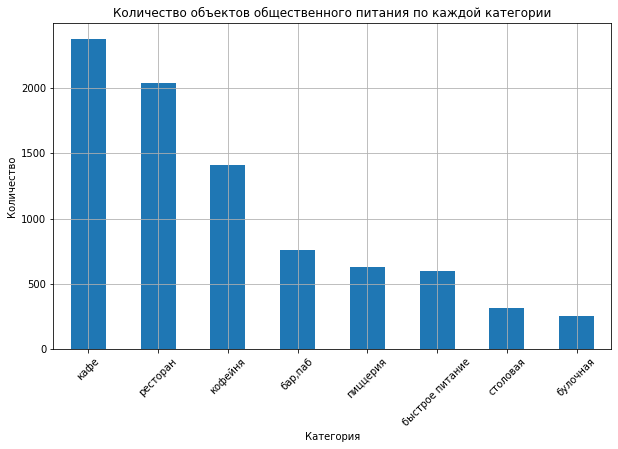

In [22]:
plt.figure(figsize=(10, 6))
restaurants_per_cat.plot.bar(legend= False, 
                title= 'Количество объектов общественного питания по каждой категории',
                ylabel= 'Количество',
                xlabel= 'Категория',             
                rot=45)


plt.grid()
plt.show()

В датафрейме представлено 8 категорий заведений общественного питания: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная, столовая. Максимальное количество заведений относятся к категориям кафе (2377), ресторан (2042), кофейня (1413). Меньше всего объектов из категории булочная (256).

---

### Задача 2



In [23]:
#Отобразим количество административных районов, представленных в данных
display(df_merged['district'].unique())
display(df_merged['district'].nunique())

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

9

In [24]:
#Количество заведений по административным округам
units_per_district = (df_merged.groupby('district')['name'].count()).sort_values(ascending=False)
display(units_per_district)

district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: name, dtype: int64

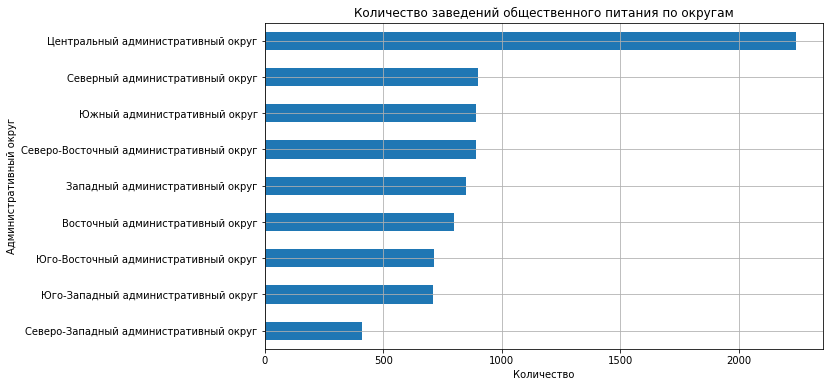

In [25]:
plt.figure(figsize=(10, 6))
units_per_district = (df_merged.groupby('district')['name'].count()).sort_values(ascending=True)

units_per_district.plot(kind='barh', x='name', y='district', legend=False)

plt.ylabel('Административный округ')
plt.xlabel('Количество')
plt.title('Количество заведений общественного питания по округам')
plt.grid()
plt.show()

In [26]:
# Отбираем заведения по ЦАО
units_tsao = df_merged[df_merged['district']=='Центральный административный округ']
#Подсчитываем количество заведений по категориям в ЦАО
units_tsao_per_cat = (units_tsao.groupby('category')['name'].count()).sort_values(ascending=False)
display(units_tsao_per_cat)


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: name, dtype: int64

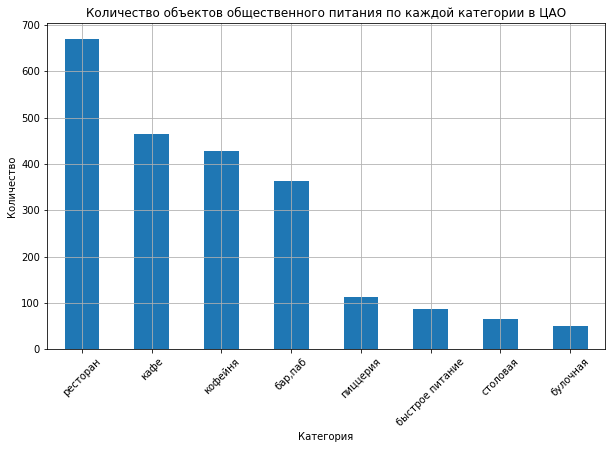

In [27]:
plt.figure(figsize=(10, 6))
units_tsao_per_cat.plot.bar(legend= False, 
                title= 'Количество объектов общественного питания по каждой категории в ЦАО',
                ylabel= 'Количество',
                xlabel= 'Категория',             
                rot=45)
plt.grid()
plt.show()

Данные представлены по 9 административным округам Москвы (Зеленоградский, Новомосковский и Троицкий округа не включены в датафрейм). Максимальное количество заведений находятся в Центральном административном округе - 2242 объекта. Этот показатель более чем в два раза выше количества заведений в САО (899), ЮАО (892) и СВАО (890). Меньше всего заведений в СЗАО - 409.

Для ЦАО отдельно приведено распределение заведений по каждой категории, так как в этом округе количество объектов максимально. 
В ЦАО преобладают рестораны, в то время как в целом по Москве больше заведений из категории кафе. Это объясняется тем, что ЦАО является наиболее дорогим районом для проживания, а так же в нем сосредоточены основные достопримечательности города и дорогие отели.  

---

### Задача 3



chain
False    5200
True     3203
Name: name, dtype: int64

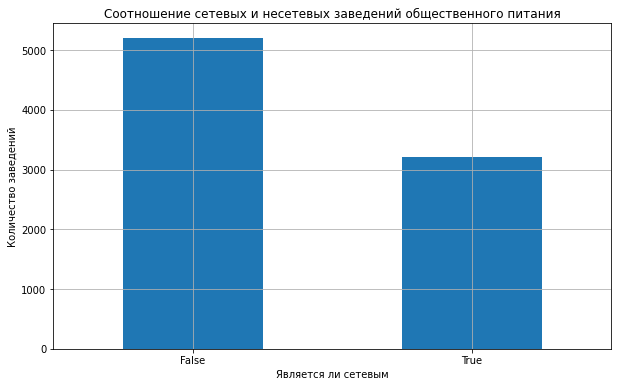

In [28]:
#Соотношение сетевых и несетевых заведений
df_chain_agg = df_merged.groupby('chain')['name'].count()

display(df_chain_agg)
df_chain_agg.plot.bar(legend= False, 
                title= 'Соотношение сетевых и несетевых заведений общественного питания',
                ylabel= 'Количество заведений', 
                xlabel= 'Является ли сетевым',      
                rot=0,
                figsize=(10, 6))
plt.grid()
plt.show()

chain,False,True
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1598,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


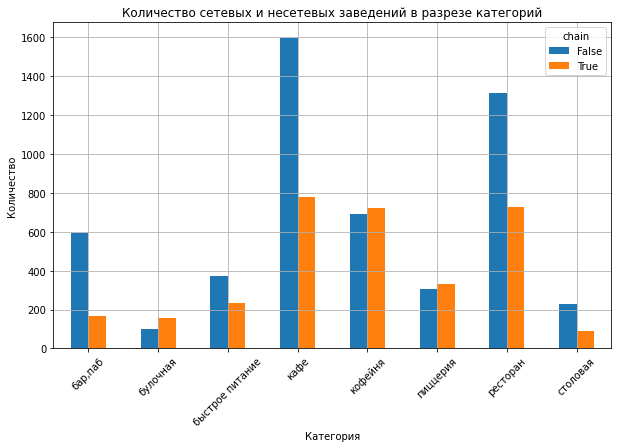

In [29]:
df_chain_cat = df_merged.groupby(['category','chain'])['name'].count().unstack(fill_value=0)
display (df_chain_cat)
df_chain_cat.plot(kind='bar', title= 'Количество сетевых и несетевых заведений в разрезе категорий',
                xlabel='Категория',
                ylabel='Количество',
                rot=45,
                figsize=(10, 6))
plt.grid()

plt.show()

In [30]:
#Проведем фильтрацию и выберем только сетевые заведения
chain_rests = df_merged[(df_merged['chain'] == True)]

In [31]:
#Подсчитаем число сетевых заведений по категориям
chain_num_in_category = chain_rests.groupby('category')['id'].count()
chain_num_in_category = chain_num_in_category.reset_index()
#Подсчитаем общее число заведений в категории и объединим датафреймы
total_in_category = df_merged.groupby('category')['id'].count()
total_in_category = total_in_category.reset_index()
chain_merged = chain_num_in_category.merge(total_in_category, on = 'category', 
                                           how = 'left',  
                                           suffixes=('_chain','_total'))
#Подсчитаем долю сетевых заведений от общего количества в каждой из категорий
chain_merged['chain_prcnt'] = chain_merged['id_chain']/chain_merged['id_total']
chain_merged = chain_merged.sort_values(by=['chain_prcnt'], ascending=False)
display(chain_merged)


,category,id_chain,id_total,chain_prcnt
1,булочная,157,256,0.613281
5,пиццерия,330,633,0.521327
4,кофейня,720,1413,0.509554
2,быстрое питание,232,603,0.384743
6,ресторан,729,2042,0.357003
3,кафе,779,2377,0.327724
7,столовая,88,315,0.279365
0,"бар,паб",168,764,0.219895


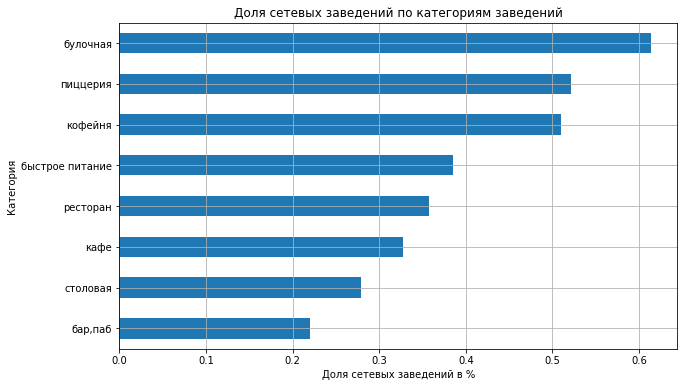

In [32]:
#Доля сетевых заведений по категориям
chain_merged = chain_merged.sort_values(by=['chain_prcnt'], ascending=True)
chain_merged.plot(kind='barh', x='category', 
                  y='chain_prcnt', 
                  legend=False,
                 figsize=(10, 6))
plt.ylabel('Категория')
plt.xlabel('Доля сетевых заведений в %')
plt.title('Доля сетевых заведений по категориям заведений')
plt.grid()
plt.show()

В Москве преобладают несетевые заведения, их количество составляет 5200. Количество сетевых заведений общественного питания 3203. 
При сравнении категорий объектов общественного питания по доле сетевых заведений можно отметить, что для булочных доля сетевых заведений максимальна - 61%. Также высокая доля сетевых заведений характерна для пиццерий и кофеен - более 50%. Меньше всего этот показатель у баров - 22%.



---

### Задача 4




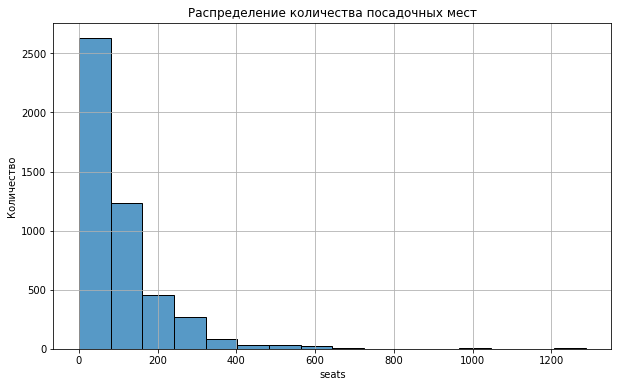

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='seats', bins=16)
plt.title('Распределение количества посадочных мест')
plt.ylabel('Количество')
plt.grid()
plt.show()

In [34]:
df_merged['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

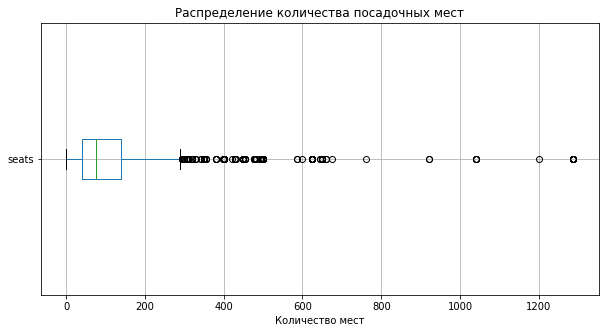

In [35]:
boxplot = df_merged.boxplot(column='seats', vert=False, showfliers=True,figsize=(10, 5))
                     #grid=False,

boxplot.set_title('Распределение количества посадочных мест')
boxplot.set_xlabel('Количество мест')
plt.show()

In [36]:
display(df_merged['seats'].mode())
df_filtered = df_merged[(df_merged['seats']<700)]
seats_per_cat = (df_filtered.groupby('category')['seats'].median()).sort_values(ascending=False)
display(seats_per_cat)

0    40
dtype: Int64

category
ресторан           86.0
бар,паб            80.0
кофейня            80.0
столовая           75.0
быстрое питание    65.0
кафе               60.0
пиццерия           53.5
булочная           50.0
Name: seats, dtype: Float64

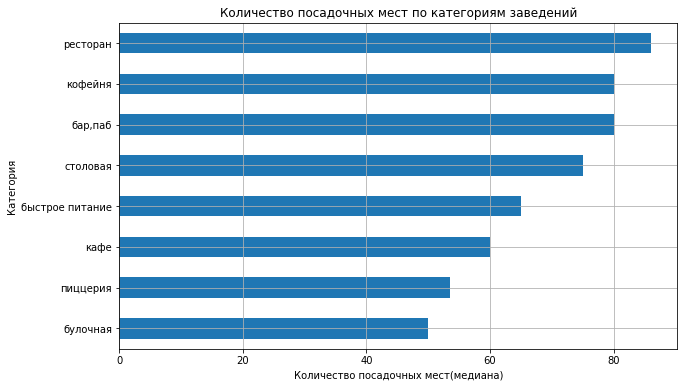

In [37]:
plt.figure(figsize=(10, 6))
seats_per_cat = (df_filtered.groupby('category')['seats'].median()).sort_values(ascending=True)
seats_per_cat.plot(kind='barh', x='seats', y='category', legend=False)
plt.ylabel('Категория')
plt.xlabel('Количество посадочных мест(медиана)')
plt.title('Количество посадочных мест по категориям заведений')
plt.grid()
plt.show()

Распределение количества посадочных мест в заведениях (столбец seats) демонстрирует гистограмма и диаграмма размаха Boxplot. Среднее количество посадочных мест составляет 108. Обращает на себя внимание большое стандартное отклонение - 120. Есть аномально высокие значения, максимальное значение посадочных мест 1288. На boxplot видно, что присутствует большое количество выбросов. Автоматически на диаграмме рассеяния выбросы определены по формуле Q3 + 1.5 * IQR, где Q3 - это третий квартиль, IQR - 
межквартильный размах. При таком расчете выбросами считаются значения свыше 300 посадочных мест. Однако можно предположить, что некоторые значения количества посадочных мест, принятые за выбросы, могут действительно иметь место в реальности, если брать в расчет крупные фудкорты. Большое количество выбросов сконцентрировано на диаграмме рассеяния в диапазоне от 300 до 600. При визуальной оценке в диапазоне от 600 до 1288 выбросов значительно меньше. Таким  образом, при дальнейшей фильтрации выбросов в качестве порогового значения выберем 600.  

После фильтрации выбросов рассмотрим какое количество посадочных мест характерно для каждой из категорий заведений. В качестве меры центральной тенденции использована медиана. Максимальным количеством посадочных мест располагают рестораны (86), бары и кофейни (80). Минимальное количество мест в пиццериях (54) и булочных (50). 



---

### Задача 5



In [38]:
# Изучаем статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df_merged['rating'].describe()

Статистические показатели столбца rating:


count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

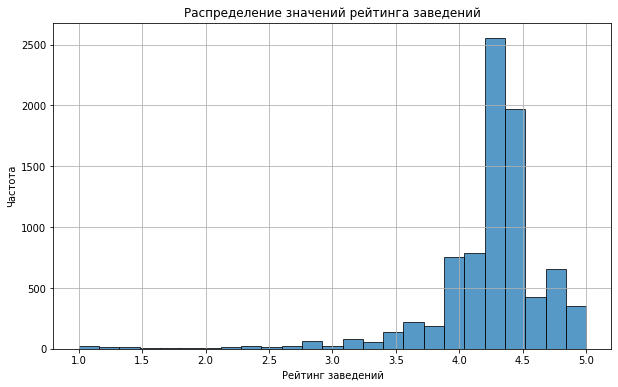

In [39]:

plt.figure(figsize=(10, 6))


df_merged['rating'].plot(
                kind='hist', 
                bins=25,
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)


plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг заведений')
plt.ylabel('Частота')

plt.grid()


plt.show()

In [40]:
# Считаем среднее и медиану для рейтинга
average_rating = df_merged['rating'].mean()
median_rating = df_merged['rating'].median()

display(f'Средний рейтинг: {round(average_rating, 2)}')
display(f'Медиана рейтинга: {round(median_rating, 2)}')

'Средний рейтинг: 4.23'

'Медиана рейтинга: 4.3'

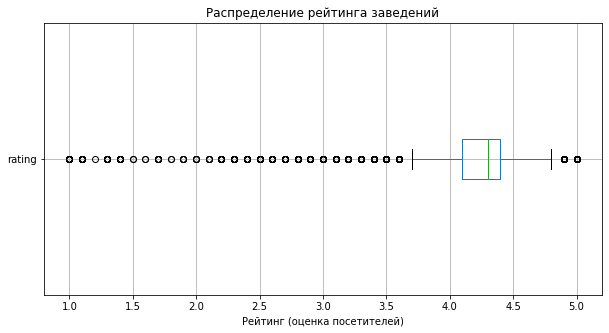

In [41]:
boxplot = df_merged.boxplot(column='rating', vert=False, showfliers=True,figsize=(10, 5))
                     

boxplot.set_title('Распределение рейтинга заведений')
boxplot.set_xlabel('Рейтинг (оценка посетителей)')
plt.show()

,category,rating
0,"бар,паб",4.387696
1,пиццерия,4.301264
2,ресторан,4.290402
3,кофейня,4.277282
4,булочная,4.268359
5,столовая,4.211429
6,кафе,4.123896
7,быстрое питание,4.050249


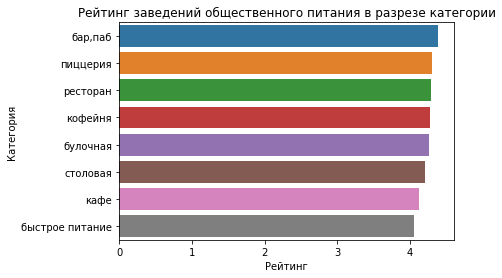

In [42]:
rating_per_category = (df_merged.groupby('category')['rating'].mean()).sort_values(ascending=False)
rating_per_category = rating_per_category.reset_index()
display(rating_per_category)
sns.barplot(data=rating_per_category, x='rating', y='category')
plt.ylabel('Категория')
plt.xlabel('Рейтинг')
plt.title('Рейтинг заведений общественного питания в разрезе категории')

plt.show()



При изучении значений рейтингов заведений общественного питания Москвы мы видим, что гистограмма отображает левоасимметричное распределение. Чаще всего встречаются значения рейтинга 4.2-4.3. Для получения детальной информации о распределении данных и выявления аномалий рассмотрим диаграмму размаха. Основное количество заведений имеют рейтинг от 3.7 до 4.7 (можно оценить по "усам" графика boxplot).

При рассмотрении рейтинга заведений по категориям можно отметить, что существенных различий нет, максимальный средний рейтинг относится к барам (4.39), минимальный средний 4.1 у кафе быстрого питания. Различия среднего рейтинга по категориям незначительны.



---

### Задача 6



In [43]:
phik_matrix = df_merged[['category', 'district', 'chain','seats','price', 'is_24_7','rating']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
display(phik_matrix.loc[phik_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False))

interval columns not set, guessing: ['seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281392
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


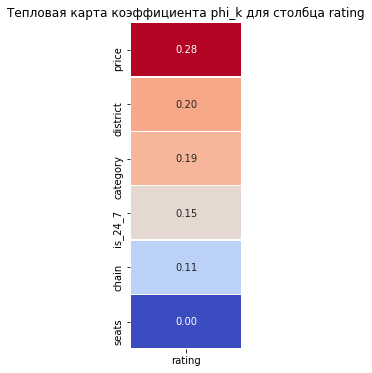

In [44]:

plt.figure(figsize=(2, 6))

data_heatmap = phik_matrix.loc[phik_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False 
           )

plt.title('Тепловая карта коэффициента phi_k для столбца rating')
plt.show()

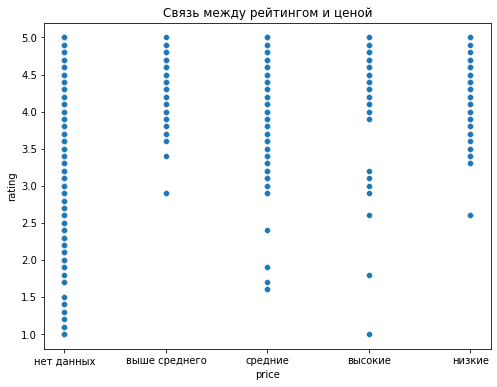

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df_merged)
plt.title('Связь между рейтингом и ценой')
plt.show()

Для изучения корреляции между рейтингом заведений и другими факторами построена матрица корреляции на основе коэффициента phi_k.  В матрице отображается корреляция рейтинга с разными данными: его категорией, положением, статусом сетевого заведения, количеством мест, ценовой категорией и признаком, является ли заведение круглосуточным. 
Самая сильная корреляционная связь выявлена между рейтингом и ценовой категорией. Для заведений с высокими и средними ценами рейтинг имеет более широкий диапазон значений, встречается больше оценок ниже среднего значения (4.3). 

---

### Задача 7



Проведем фильтрацию заведений по признаку принадлежности к сети.

In [46]:
chain_rests = df_merged[(df_merged['chain'] == True)]
display(chain_rests.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False
13,aea18265b0a0415893f1e796b82568fe,буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,True,180,нет данных,нет данных,NaN,NaN,False
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,True,<NA>,нет данных,нет данных,NaN,NaN,True
20,1ab5691e4da844d3abadf085e0957852,чебуреки_манты,кафе,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",4.3,True,148,нет данных,нет данных,NaN,NaN,False
23,78709462f2b3480f825489a5321a3563,буханка,булочная,"Москва, Лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",4.7,True,<NA>,нет данных,нет данных,NaN,NaN,False


Выделим топ-15 самых распространенных по количеству сетевых заведений.

,name,id
0,шоколадница,120
1,домино'с_пицца,76
2,додо_пицца,74
3,one_price_coffee,71
4,яндекс_лавка,69
5,cofix,65
6,prime,50
7,хинкальная,44
8,кофепорт,42
9,кулинарная_лавка_братьев_караваевых,39


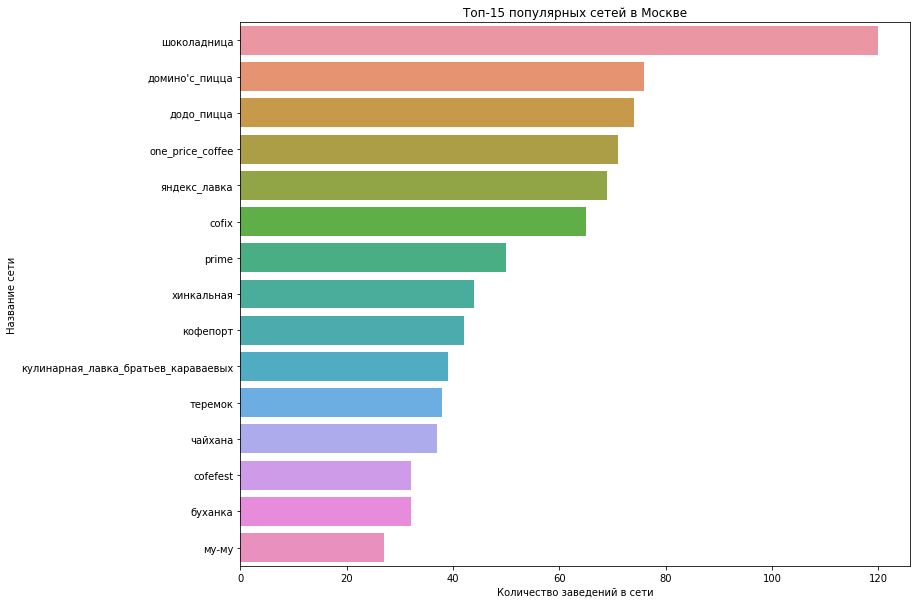

In [47]:
top_15_chain_rest = ((chain_rests.groupby('name')['id'].count()).sort_values(ascending=False)).head(15)
top_15_chain_rest = top_15_chain_rest.reset_index()
display(top_15_chain_rest)

plt.figure(figsize=(12, 10))
sns.barplot(data=top_15_chain_rest, x='id', y='name')
plt.ylabel('Название сети')
plt.xlabel('Количество заведений в сети')
plt.title('Топ-15 популярных сетей в Москве')
plt.show()

Отобразим рейтинг и категорию популярных сетевых заведений.

In [48]:
chain_category = (chain_rests.groupby('name').agg({'id': 'count','rating': 'mean'})).sort_values(by='id',ascending=False).head(15)
chain_category = chain_category.reset_index()
chain_category['category']=df_merged['category']
display(chain_category) 


,name,id,rating,category
0,шоколадница,120,4.177500,кафе
1,домино'с_пицца,76,4.169737,ресторан
2,додо_пицца,74,4.286486,кафе
3,one_price_coffee,71,4.064789,кофейня
4,яндекс_лавка,69,3.872464,пиццерия
5,cofix,65,4.075385,пиццерия
6,prime,50,4.116000,"бар,паб"
7,хинкальная,44,4.322727,быстрое питание
8,кофепорт,42,4.147619,ресторан
9,кулинарная_лавка_братьев_караваевых,39,4.394872,кафе


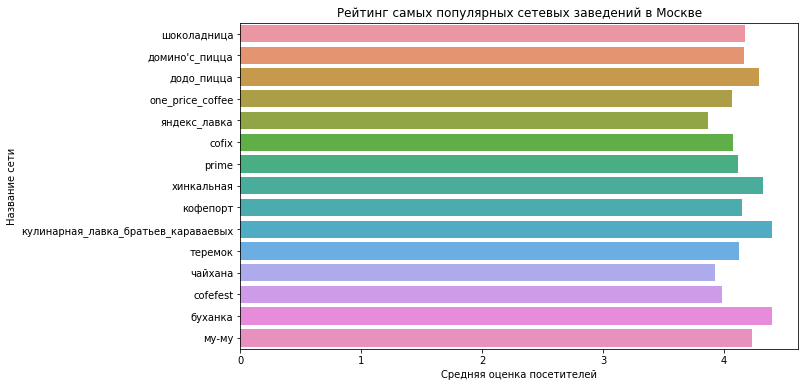

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=chain_category, y='name', x='rating')
plt.ylabel('Название сети')
plt.xlabel('Средняя оценка посетителей')
plt.title('Рейтинг самых популярных сетевых заведений в Москве')
plt.show()

,category,id
0,"бар,паб",115
1,булочная,32
2,быстрое питание,44
3,кафе,302
4,кофейня,71
5,пиццерия,134
6,ресторан,118


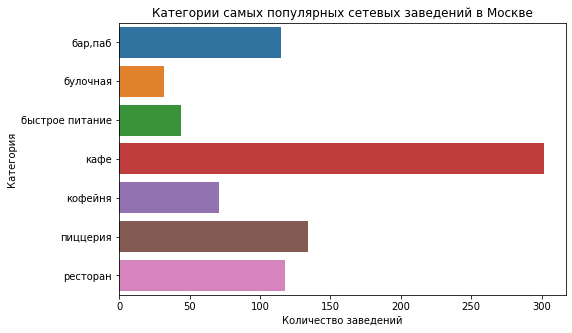

In [50]:
top15_cat=chain_category.groupby('category')['id'].sum()
top15_cat = top15_cat.reset_index()
display(top15_cat)
с




На графике отражены топ-15 самых популярных сетей в Москве (по количеству заведений в сети). Больше всего заведений в сетях Шоколадница (120 заведений), Домино'с пицца	(76), Додо пицца 74. 


По графику 'Рейтинг самых популярных сетевых заведений в Москве' можно отметить, что популярные сетевые заведения не сильно варьируют по рейтингу. Значение среднего рейтинга меняются незначительно от 3.9 до 4.2. Абсолютное большинство популярных сетевых заведений относится к категории кафе.

---

### Задача 8



In [51]:
avg_bill_district=(df_merged.groupby('district')['middle_avg_bill'].mean()).sort_values(ascending=False)
avg_bill_district=avg_bill_district.reset_index()
display(avg_bill_district)

,district,middle_avg_bill
0,Центральный административный округ,1191.057547
1,Западный административный округ,1053.225490
2,Северный административный округ,927.959627
3,Южный административный округ,834.398089
4,Северо-Западный административный округ,822.222930
5,Восточный административный округ,820.626923
6,Юго-Западный административный округ,792.561702
7,Северо-Восточный административный округ,716.611296
8,Юго-Восточный административный округ,654.097938


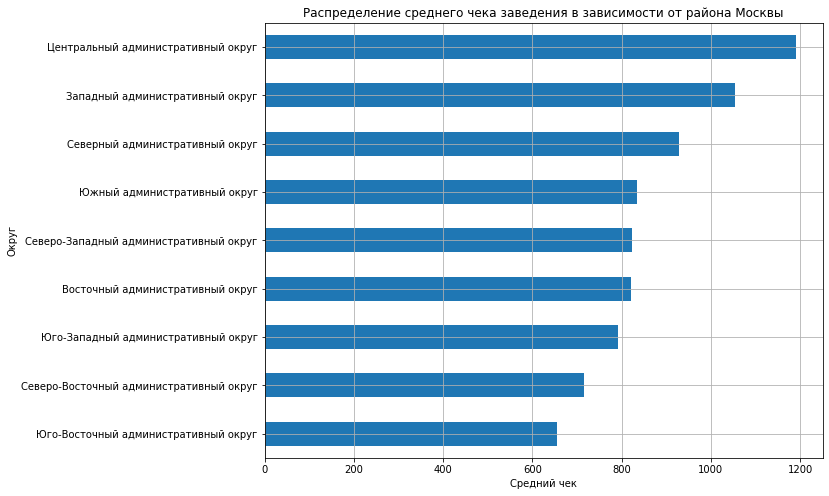

In [52]:
avg_bill_district=(df_merged.groupby('district')['middle_avg_bill'].mean()).sort_values(ascending=True)
avg_bill_district.plot(kind='barh',
               title=f'Распределение среднего чека заведения в зависимости от района Москвы',
               rot=0,
               figsize=(10, 8))
plt.ylabel('Округ')
plt.xlabel('Средний чек')
plt.grid()

plt.show()

Значение среднего чека (столбец `middle_avg_bill`) значительно варьирует в зависимости от района Москвы. Самая большая величина 
среднего чека в ЦАО (1191), самая низкая - в ЮВАО (654). Эти данные соотносятся с различной стоимостью недвижимости в округах Москвы в зависимости от удаленности от центра. Центральный администратвиный округ также располагает большим количеством туристических мест и гостиниц, поэтому спрос и стоимость заказа в заведениях общественного питания высоки.


---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [53]:
middle_coffee_district=(df_merged.groupby('district')['middle_coffee_cup'].mean()).sort_values(ascending=False)
middle_coffee_district=middle_coffee_district.reset_index()
display(middle_coffee_district)

,district,middle_coffee_cup
0,Западный административный округ,189.640000
1,Центральный административный округ,188.210843
2,Юго-Западный административный округ,183.485714
3,Восточный административный округ,174.023810
4,Северо-Восточный административный округ,165.333333
5,Северный административный округ,165.090909
6,Северо-Западный административный округ,160.458333
7,Южный административный округ,157.826087
8,Юго-Восточный административный округ,150.771429


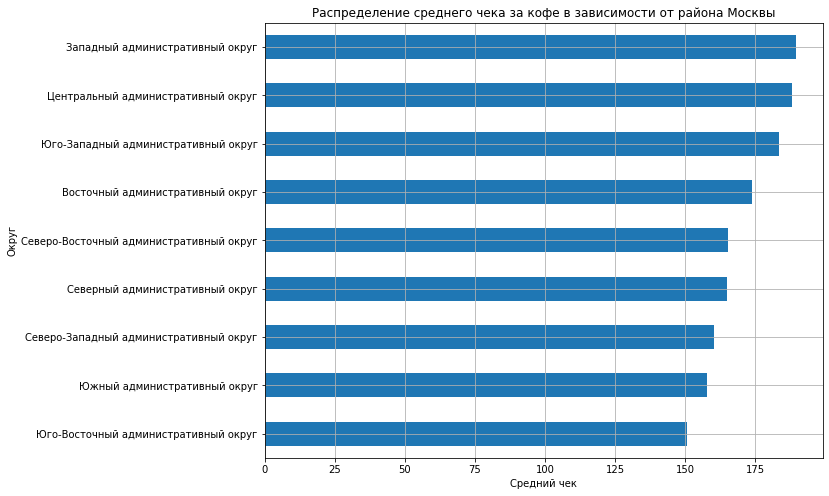

In [54]:
middle_coffee_district=(df_merged.groupby('district')['middle_coffee_cup'].mean()).sort_values(ascending=True)
middle_coffee_district.plot(kind='barh',
               title=f'Распределение среднего чека за кофе в зависимости от района Москвы',
               rot=0,
               figsize=(10, 8))
plt.ylabel('Округ')
plt.xlabel('Средний чек')
plt.grid()

plt.show()

is_24_7
False    7673
True      730
Name: name, dtype: int64

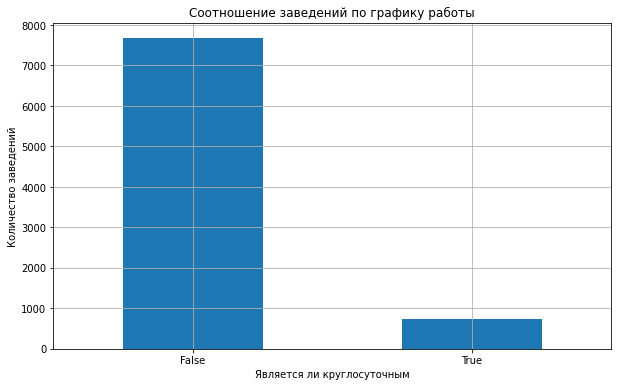

In [55]:

df_24_7 = df_merged.groupby('is_24_7')['name'].count()

display(df_24_7)
df_24_7.plot.bar(legend= False, 
                title= 'Соотношение заведений по графику работы',
                ylabel= 'Количество заведений', 
                xlabel= 'Является ли круглосуточным',      
                rot=0,
                figsize=(10, 6))
plt.grid()
plt.show()

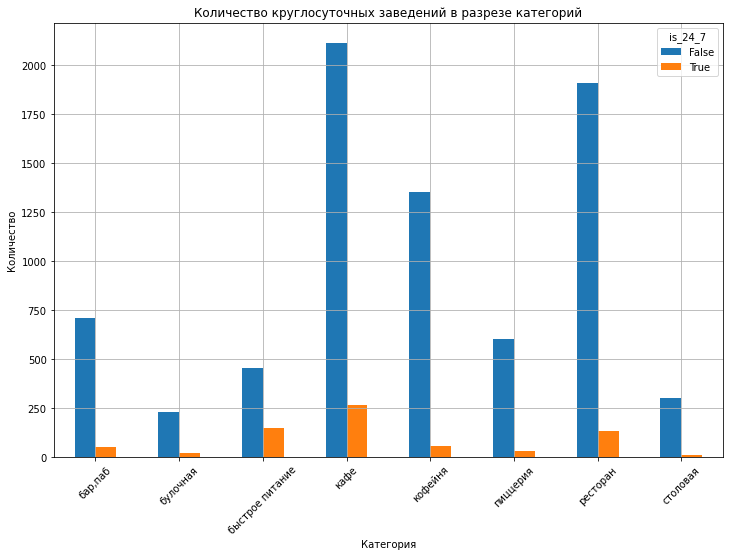

In [56]:
df_24_cat = df_merged.groupby(['category','is_24_7'])['name'].count().unstack(fill_value=0) 

df_24_cat.plot(kind='bar', title= 'Количество круглосуточных заведений в разрезе категорий',
                xlabel='Категория',
                ylabel='Количество',
                rot=45,
                figsize=(12, 8))
plt.grid()

plt.show()

Различия в средней цене чашки кофе (столбец `middle_coffee_cup`) по округам Москвы не так значительны, как величина общего чека, диапазон значений составил 150-190 р. Однако закономерное повышение стоимости в ЦАО и ЗАО прослеживается и в этом показателе и связано с более высокой стоимостью недвижимости в этих районах города. 

Также было проанализировано количество заведений по графику работы. Заведений, которые работают 24/7, меньшинство. Их количество составило 730. Больше всего круглосуточных заведений в категориях кафе, быстрое питание, ресторан. Минимальное количество круглосуточных заведений в категории столовая.


---

### Промежуточный вывод



В ходе исследовательского анализа данных заведений общественного питания Москвы были рассмотрены различия по категориям и/или районам Москвы таких показателей как: количество заведений, число сетевых заведений, средний чек, цена чашки кофе, число круглосуточных заведений. Была изучена вариация таких показателей как количество посадочных мест, рейтинг, корреляция рейтинга с другими данными. 

Количество заведений и стоимость заказа сильно варьируют по районам Москвы, эти показатели максимальны для ЦАО. 

Большая часть заведений относится к категориям кафе, рестораны, кофейни. 
Для булочных доля сетевых заведений максимальна - 61%. Также высокая доля сетевых заведений характерна для пиццерий и кофеен - более 50%. Меньше всего этот показатель у баров - 22%.


## 4. Итоговый вывод и рекомендации
<a class='anchor' id="link6"></a>



Исследовательский анализ рынка заведений общественного питания Москвы включал следующие этапы:
- загрузка данных, подготовка единого датафрейма, включающего информацию по заведениям и ценам;

- проверка ошибок в данных и их предобработка;

- исследовательский анализ данных;

- выводы о проделанной работе. 



В ходе предобработки: 

- столбец seats приведен к типу int64, а chain - к типу Bool; 

- подсчитано количество пропусков в данных; 

- пропуски в столбцах hours, price, avg_bill заменены на значение "нет данных";

- удалены явные дубликаты;

- добавлен столбец is_24_7 (работает круглосуточно и ежедневно).


После предобработки количество строк в датафрейме составило 8403. 

В ходе исследовательского анализа данных были рассмотрены различия по категориям и/или районам Москвы таких показателей как: количество заведений, число сетевых заведений, средний чек, цена чашки кофе, число круглосуточных заведений. Была изучена вариация таких показателей как количество посадочных мест, рейтинг, корреляция рейтинга с другими данными. 



Максимальное количество заведений относятся к категориям кафе (2377), ресторан (2042), кофейня (1413). Меньше всего объектов из категории булочная (256).





Максимальное количество заведений находятся в Центральном административном округе - 2242 объекта. Этот показатель более чем в два раза выше количества заведений в САО (899), ЮАО (892) и СВАО (890). Меньше всего заведений в СЗАО - 409.

Для ЦАО отдельно приведено распределение заведений по каждой категории. Преобладают рестораны, в то время как в целом по Москве больше заведений из категории кафе. Это объясняется тем, что ЦАО является наиболее дорогим районом для проживания, а так же в нем сосредоточены основные достопримечательности города и дорогие отели. 

В Москве преобладают несетевые заведения, их количество составляет 5200. Количество сетевых заведений общественного питания 3203. Сетевые заведения преобладают в категории кафе, рестораны, кофейни. Меньше всего сетевых завдений среди булочных и столовых.

Количество посадочных мест варьирует по категориям заведений. Максимальным количеством посадочных мест располагают рестораны (86), бары и кофейни (80). Минимальное количество мест в пиццериях (54) и булочных (50).

При рассмотрении рейтинга заведений по категориям можно отметить, что существенных различий нет, максимальный средний рейтинг относится к барам (4.39), минимальный средний 4.1 у кафе быстрого питания. Различия среднего рейтинга по категориям незначительны.


Для изучения корреляции между рейтингом заведений и другими факторами построена матрица корреляции на основе коэффициента phi_k. В матрице отображается корреляция рейтинга с разными данными: его категорией, положением, статусом сетевого заведения, количеством мест, ценовой категорией и признаком, является ли заведение круглосуточным. Самая сильная корреляционная связь выявлена между рейтингом и ценовой категорией. Для заведений с высокими и средними ценами рейтинг имеет более широкий диапазон значений, встречается больше оценок ниже среднего значения (4.3).

Больше всего заведений в сетях Шоколадница (120 заведений), Домино'с пицца (76), Додо пицца 74. Популярные сетевые заведения не сильно варьируют по рейтингу (3.9-4.2). Большинство популярных сетевых заведений относится к категории кафе.

Значение среднего чека значительно варьирует в зависимости от района Москвы. Самая большая величина среднего чека в ЦАО (1191), самая низкая - в ЮВАО (654). Эти данные соотносятся с различной стоимостью недвижимости в округах Москвы в зависимости от удаленности от центра. Центральный администратвиный округ также располагает большим количеством туристических мест и гостиниц, поэтому спрос и стоимость заказа в заведениях общественного питания высоки. Прослеживается также закономерное повышение стоимости чашки кофе в ЦАО и ЗАО. 

Заведений, которые работают 24/7, меньшинство. Их количество составило 730. Больше всего круглосуточных заведений в категориях кафе, быстрое питание, ресторан. Минимальное количество круглосуточных заведений в категории столовая.


Можно рекомендовать СЗАО, ЮЗАО, ЮВАО как перспективные районы для открытия нового объекта общественного питания, так как эти районы минимально обеспечены заведениями, в то время как активная застройка новыми жилыми комплексами проводится во всех районах Москвы. Количество заведений в СЗАО минимально - 409, в ЮЗАО 709, ЮВАО - 714. Для сравнения количество заведений в ЮАО - 892, в САО 899, в ЦАО - 2242.


Для выбора категории заведения необходима дополнительная детальная информация на локальном уровне. Какие заведения уже открыты поблизости, планируется открытие объекта в новом ЖК или на территории старой застройки и т.д. 

Самыми популярными категориями в городе являются кафе (2377 объекта), рестораны (2042) и кофейни (1413).

Поскольку в рекомендованных для открытия потенциального заведения округах активно проводится застройка новыми жилыми комплексами, можно рекомендовать при выборе категории обратить внимание количество посадочных мест и принадлежность к сети. При расположении в новом жилом комплексе удобно выбрать знакомое посетителям сетевое заведение с не очень большим количеством посадочных мест, так как не всегда на первых этажах новых домов есть пространство для больших залов. Категории с высокой долей сетевых заведений это булочные (доля сетевых заведений максимальна - 61%), пиццерии и кофейни (более 50%). Булочные и пиццерии также можно рекомендовать, поскольку для них характерно небольшое количество посадочных мест (для булочных средний показатель 50, для пиццерий - 53, в то время как кофейни рассчитаны на большее количество посадочных мест, 80). 



При обосновании цены на ассортимент заведения можно рекомендовать ориентироваться на медианные значения среднего чека по выбранному округу: ЮЗАО средний чек 792.56 , ЮВАО 654.1, СЗАО 822. Средняя цена чашки кофе: ЮЗАО 183.5 , ЮВАО 150.8, СЗАО 160.5.

